# Laboratorio Aprendizaje Supervisado.

## Regresión y clasificación binaria con scikit-learn


### Importación de librerias y dataset de california 

In [82]:
#Para analizar 
import pandas as pd 
import numpy as np 

#para graficar
import matplotlib.pyplot as plt 
import seaborn as sb 

#El dataset
from sklearn.datasets import fetch_california_housing

#separación de data
from sklearn.model_selection import train_test_split

#Modelos de regresión
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

#Metricas que evaluamos
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ========== IMPORTACIONES PARA CLASIFICACIÓN (PARTE 2) ==========

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Preprocesamiento
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Métricas de clasificación
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report,
    make_scorer
)

## 1. Carga y exploración de datos

### 1.1 Carga del dataset

El dataset *California Housing* se obtiene directamente desde la librería scikit-learn.
Se utiliza el parámetro `as_frame=True` para trabajar con los datos en formato DataFrame de pandas.

In [83]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)

x= housing.data
y= housing.target

### 1.2 Estadísticas descriptivas

A continuación se muestran estadísticas descriptivas básicas de las variables independientes
y de la variable objetivo.

In [84]:
x.describe()
y.describe()

count    20640.000000
mean         2.068558
std          1.153956
min          0.149990
25%          1.196000
50%          1.797000
75%          2.647250
max          5.000010
Name: MedHouseVal, dtype: float64

Se observa que las variables presentan diferentes escalas y rangos de valores.
La variable objetivo corresponde al valor mediano de la vivienda y muestra una dispersión considerable.
Los rangos son de 0-5. Es el valor de la vivienda en cientos de miles de dolares.

### 1.3 Análisis de la variable objetivo y relaciones generales

Se analiza la distribución de la variable objetivo para identificar posibles asimetrías
y comportamientos relevantes para los modelos de regresión.

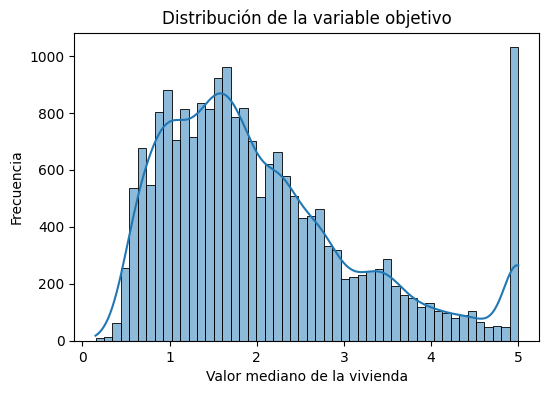

In [85]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,4))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribución de la variable objetivo")
plt.xlabel("Valor mediano de la vivienda")
plt.ylabel("Frecuencia")
plt.show()

La variable objetivo presenta una distribución asimétrica con cola hacia valores altos.
Además, se observa una acumulación de observaciones en el valor máximo, lo que sugiere
un efecto de censura en los datos. Esta característica puede dificultar el ajuste de
modelos lineales y favorecer modelos no lineales capaces de capturar relaciones más
complejas.

La variable objetivo representa el valor mediano de la vivienda en centenas de miles de dólares.
El valor máximo se encuentra censurado en 5, lo que implica que propiedades con valores
superiores a 500.000 USD son representadas de forma indistinguible.

### Relaión general entre variables 

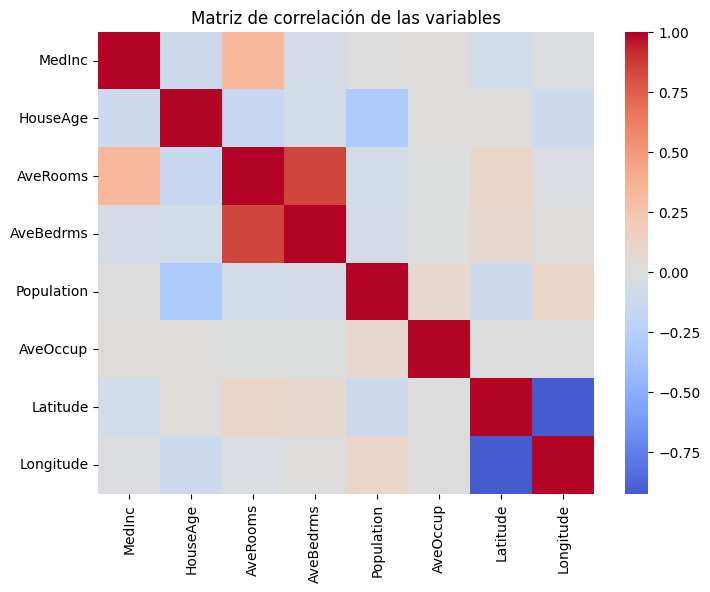

In [86]:
plt.figure(figsize=(8,6))
sns.heatmap(x.corr(), cmap="coolwarm", center=0)
plt.title("Matriz de correlación de las variables")
plt.show()

La matriz de correlación muestra que la variable MedInc presenta una correlación positiva
moderada con el valor mediano de la vivienda, lo que indica su relevancia predictiva.
Asimismo, se observa una alta correlación entre algunas variables independientes, como
AveRooms y AveBedrms, lo que podría generar multicolinealidad en modelos lineales.
Los modelos basados en árboles resultan menos sensibles a este fenómeno.

___

## 2. Separación de los datos

El dataset se divide en conjuntos de entrenamiento y prueba con el objetivo de evaluar
la capacidad de generalización de los modelos. Se utiliza un 80% de los datos para
entrenamiento y un 20% para prueba. Además, se fija el parámetro `random_state` para
garantizar la reproducibilidad de los resultados.

In [87]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, y_train.shape # para ver como se separan los datos de entrenamiento 
x_test.shape, y_test.shape # para ver como se separan los datos de prueba

((4128, 8), (4128,))

La proporción elegida permite entrenar los modelos con una cantidad suficiente de datos,
manteniendo un conjunto de prueba representativo. El uso de una semilla fija asegura que
los resultados puedan ser reproducidos.

___

## 3. Entrenamiento inicial de los modelos de regresión

En esta sección se entrenan distintos modelos de regresión utilizando los
hiperparámetros por defecto, con el objetivo de obtener un desempeño inicial
que sirva como referencia para comparaciones posteriores.

In [88]:
#Regresión Lineal

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

y_pred_linear = linear_model.predict(x_test)

In [89]:
#Árbol de decisión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(x_train, y_train)

y_pred_tree = tree_model.predict(x_test)

In [90]:
#Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train, y_train)

y_pred_rf = rf_model.predict(x_test)  

### 3.4 Evaluación de los modelos en el conjunto de prueba
En esta sección se evalúa el desempeño de los modelos entrenados utilizando el conjunto
de prueba. Para ello, se calculan métricas de regresión que permiten cuantificar el error
de predicción y la capacidad explicativa de cada modelo.

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluar(y_true, y_pred):
    return {
        "MAE": mean_absolute_error(y_true, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_true, y_pred)),
        "R2": r2_score(y_true, y_pred)
    }

resultados = {
    "Regresión Lineal": evaluar(y_test, y_pred_linear),
    "Árbol de Decisión": evaluar(y_test, y_pred_tree),
    "Random Forest": evaluar(y_test, y_pred_rf)
}

resultados

{'Regresión Lineal': {'MAE': 0.5332001304956558,
  'RMSE': np.float64(0.7455813830127761),
  'R2': 0.5757877060324511},
 'Árbol de Decisión': {'MAE': 0.45467918846899225,
  'RMSE': np.float64(0.7037294974840077),
  'R2': 0.622075845135081},
 'Random Forest': {'MAE': 0.32754256845930246,
  'RMSE': np.float64(0.5053399773665033),
  'R2': 0.8051230593157366}}

Los resultados iniciales muestran que el modelo de Random Forest presenta el mejor
desempeño en todas las métricas evaluadas, con un menor error promedio y una mayor
capacidad explicativa. Esto sugiere que el problema presenta relaciones no lineales
que son capturadas de mejor manera por modelos basados en árboles.

___

## 4 Optimización de hiperparámetros

La regresión lineal no fue incluida en el proceso de optimización de hiperparámetros,
debido a que su versión estándar no posee hiperparámetros estructurales relevantes
que afecten significativamente la complejidad del modelo.

### 4.1 GridSearchCV

Se utiliza GridSearchCV debido a que el número de hiperparámetros evaluados es acotado
y permite explorar de forma exhaustiva todas las combinaciones posibles. Además,
GridSearchCV incorpora validación cruzada, lo que proporciona una estimación más robusta
del desempeño del modelo.

### 4.2 Validación cruzada
Se empleó validación cruzada con 5 particiones (cv=5), lo que permite obtener
una estimación más robusta del desempeño promedio del modelo, reduciendo la
dependencia de una única división de los datos y mejorando la estabilidad de
los resultados.

### 4.3 Optimización — Árbol de Decisión

***Hiperparámetros relevantes***

- max_depht -> controla complejidad 
- min_samples_leaf -> evita sobreajuste 
- min_samples_split -> tamańo mínimo para dividir

In [92]:
from sklearn.model_selection import GridSearchCV

param_grid_tree = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "min_samples_split": [2, 5, 10]
}

tree = DecisionTreeRegressor(random_state=42)

grid_tree = GridSearchCV(
    estimator=tree,
    param_grid=param_grid_tree,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

grid_tree.fit(x_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",DecisionTreeR...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 5, ...], 'min_samples_leaf': [1, 5, ...], 'min_samples_split': [2, 5, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candid

In [93]:
best_grid = grid_tree.best_params_
best_tree = grid_tree.best_estimator_

print(best_grid)
print(best_tree)

{'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 2}
DecisionTreeRegressor(min_samples_leaf=10, random_state=42)


### 4.2 Optimización — Random Forest

***Hiperparámetros relevantes***

- n_estimators -> números de árboles 
- max_depth -> complejidad 
- max_features -> número de variables por split 
- min_samples_leaf -> regularización 

In [94]:
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "max_features": ["sqrt", "log2"],
    "min_samples_leaf": [1, 5]
}

rf = RandomForestRegressor(random_state=42)

grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring="neg_mean_squared_error",
    cv=5,
    n_jobs=-1
)

grid_rf.fit(x_train, y_train)

grid_rf.best_params_
best_rf = grid_rf.best_estimator_

print(grid_rf.best_params_)
print(best_rf)

{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 100}
RandomForestRegressor(max_depth=20, max_features='log2', random_state=42)


GridSearchCV retorna el modelo que obtiene el mejor desempeño promedio en validación cruzada,
junto con los hiperparámetros asociados. Además, permite acceder a los resultados completos
de cada combinación evaluada.

___

## 5 Evaluación del rendimiento 
Se utilizan MAE, RMSE y R² como métricas de evaluación. MAE permite interpretar
el error promedio en las mismas unidades que la variable objetivo. RMSE penaliza
con mayor peso los errores grandes, proporcionando una medida sensible a outliers.
R² indica la proporción de la variabilidad explicada por el modelo.

In [95]:
y_pred_tree_opt = best_tree.predict(x_test)
y_pred_rf_opt = best_rf.predict(x_test)

resultados_opt = {
    "Árbol Optimizado": evaluar(y_test, y_pred_tree_opt),
    "Random Forest Optimizado": evaluar(y_test, y_pred_rf_opt)
}

resultados_opt

{'Árbol Optimizado': {'MAE': 0.40481361504421026,
  'RMSE': np.float64(0.6031772021916121),
  'R2': 0.7223593982604586},
 'Random Forest Optimizado': {'MAE': 0.32243049927637407,
  'RMSE': np.float64(0.49179494029659526),
  'R2': 0.8154299403335827}}

Al comparar los modelos evaluados, se observa que el Random Forest optimizado
presenta el mejor desempeño en todas las métricas consideradas. Este modelo
logra el menor error promedio y la mayor capacidad explicativa, alcanzando un
R² superior al 0.8.

El Árbol de Decisión optimizado mejora significativamente respecto a su versión
inicial, evidenciando la importancia de la regularización. Por su parte, la
Regresión Lineal ofrece un desempeño base razonable, aunque limitado frente a
modelos capaces de capturar relaciones no lineales.

En términos de generalización, el Random Forest demuestra un mejor equilibrio
entre complejidad y estabilidad, reduciendo el riesgo de sobreajuste.

## Análisis e Interpretación 

***Recordando los mejores parámetros*** 

- max_depth : 20 
- max_features : log2 
- min_samples_leaf : 1
- n_estimators : 100

El modelo óptimo corresponde a un Random Forest con profundidad máxima 20,
100 árboles y selección de variables por log2 en cada división. Esta configuración
permite capturar relaciones complejas sin crecer indefinidamente, mientras que
la combinación de múltiples árboles reduce la varianza y mejora la generalización.

### Interpretación de importancia de variables 

In [96]:
importancias = pd.Series(
    best_rf.feature_importances_,
    index=x.columns
).sort_values(ascending=False)

importancias

MedInc        0.401317
AveOccup      0.128716
Latitude      0.125020
Longitude     0.118127
AveRooms      0.101845
HouseAge      0.054056
AveBedrms     0.040314
Population    0.030604
dtype: float64

La variable MedInc presenta la mayor importancia (40%), lo que confirma que el ingreso
mediano del distrito es el principal determinante del valor de la vivienda. Este resultado
es consistente con la intuición económica y con el análisis de correlación previo.

Asimismo, variables como AveOccup, Latitude y Longitude muestran una relevancia
considerable, indicando que tanto la densidad de ocupación como la ubicación geográfica
influyen significativamente en el precio.

Las variables estructurales como número promedio de habitaciones o antigüedad presentan
menor importancia relativa, lo que sugiere que factores socioeconómicos y geográficos
tienen un peso mayor en la predicción del valor inmobiliario.

### Complejidad del modelo 

El modelo presenta una complejidad considerable debido a la profundidad máxima de 20
y al uso de 100 árboles. Esta configuración permite capturar relaciones no lineales
y patrones complejos entre las variables. Sin embargo, la selección aleatoria de
variables en cada división (log2) introduce diversidad entre los árboles,
evitando que el modelo memorice los datos de entrenamiento.


### Generalización 
El modelo demuestra una buena capacidad de generalización, reflejada en su alto R²
en el conjunto de prueba. La combinación de múltiples árboles reduce la varianza
del modelo y permite mantener estabilidad frente a datos no vistos, evitando
problemas significativos de sobreajuste.

### Relación entre variables y variable objetivo 
El análisis de importancia de variables indica que el ingreso mediano del distrito
es el principal determinante del valor de la vivienda, seguido por factores
geográficos y de densidad de ocupación. Esto sugiere que el precio inmobiliario
está fuertemente influenciado por variables socioeconómicas y de ubicación,
más que por características estructurales aisladas.

La capacidad del modelo para capturar estas interacciones confirma la presencia
de relaciones no lineales entre las variables independientes y la variable objetivo.

### Comparación de modelos de regresión

Se entrenaron tres modelos de regresión: Regresión Lineal, Árbol de Decisión y
Random Forest. Los resultados iniciales mostraron que los modelos basados en
árboles superan a la regresión lineal, lo que sugiere la presencia de relaciones
no lineales en los datos.

Tras la optimización de hiperparámetros mediante GridSearchCV, el Árbol de
Decisión mostró una mejora significativa en su desempeño, mientras que el
Random Forest presentó una mejora moderada respecto a su versión inicial.

En términos globales, el Random Forest optimizado obtuvo el mejor desempeño
en todas las métricas evaluadas.

### Tabla resumen final 
***Tabla conceptual***

| Modelo | Mejores Hiperparámetros | MAE | RMSE | R² |
| :--- | :--- | :---: | :---: | :---: |
| **Regresión lineal** | Default | 0.53 | 0.75 | 0.58 |
| **Árbol de decisión** | `max_depth=None`, `min_samples_leaf=10` | 0.40 | 0.60 | 0.72 |
| **Random Forest** | `max_depth=20`, `n_estimators=100`, `max_features=log2` | 0.32 | 0.49 | 0.81 |


La tabla anterior resume el desempeño de cada modelo junto con sus mejores
configuraciones. Se observa que el Random Forest optimizado logra el menor
error promedio y la mayor capacidad explicativa, alcanzando un R² superior a 0.8.

### Discusión sobre sobreajuste y generalización

El Árbol de Decisión en su versión inicial presentaba indicios de sobreajuste,
lo que se evidenció en su mejora tras la regularización mediante hiperparámetros.
El Random Forest, al ser un modelo ensemble, mostró mayor estabilidad desde el
inicio, reduciendo la varianza y mejorando la generalización.

La validación cruzada permitió seleccionar configuraciones que equilibran
complejidad y capacidad predictiva, evitando que el modelo memorice los datos
de entrenamiento.

### Conclusiones Generales 

En conclusión, el análisis evidencia que el problema de predicción del valor
de la vivienda presenta relaciones no lineales y dependencias complejas entre
las variables independientes.

El Random Forest optimizado se consolida como el modelo más adecuado para este
problema, al ofrecer el mejor equilibrio entre complejidad, precisión y
capacidad de generalización. Asimismo, el análisis de importancia de variables
confirma que factores socioeconómicos y geográficos, como el ingreso mediano
y la ubicación, desempeñan un rol fundamental en la determinación del precio
inmobiliario.

Estos resultados destacan la relevancia de utilizar modelos capaces de capturar
interacciones no lineales en problemas de regresión con múltiples variables.

___

# PARTE 2: Problema de Clasificación Binaria

## Clasificación con scikit-learn: Breast Cancer Dataset

## 1. Carga y exploración de datos

### 1.1 Carga del dataset

El dataset *Breast Cancer Wisconsin* se obtiene directamente desde la librería scikit-learn.
Se utiliza el parámetro `as_frame=True` para trabajar con los datos en formato DataFrame de pandas.
Este dataset contiene información sobre características de tumores de mama y su diagnóstico
(maligno o benigno), siendo un problema de clasificación binaria.

In [97]:
from sklearn.datasets import load_breast_cancer

# Cargar el dataset
data = load_breast_cancer(as_frame=True)

# Separar features y target
df = data.frame
y_bc = data.target

# Mostrar información básica
print("Dimensiones del dataset:")
print(f"Features: {df.shape}")
print(f"Target: {y_bc.shape}")
print(f"\nPrimeras 5 filas:")
df.head()

Dimensiones del dataset:
Features: (569, 31)
Target: (569,)

Primeras 5 filas:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 1.2 Estadísticas descriptivas

A continuación se muestran estadísticas descriptivas básicas de las variables independientes
y de la variable objetivo.

In [98]:
# Estadísticas descriptivas de las features
print("Estadísticas descriptivas de las variables independientes:")
df.describe()

print("\n\nDistribución de la variable objetivo:")
y_bc.describe()

Estadísticas descriptivas de las variables independientes:


Distribución de la variable objetivo:


count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

Se observa que las variables presentan diferentes escalas y rangos de valores, con
magnitudes que varían considerablemente entre features. Esto sugiere la necesidad de
aplicar estandarización para modelos sensibles a la escala (como Regresión Logística y kNN).

La variable objetivo es binaria: 0 representa tumores malignos y 1 representa tumores benignos.

### 1.3 Análisis del balance de clases

En problemas de clasificación binaria es fundamental analizar si existe desbalance entre
las clases, ya que esto puede afectar el rendimiento de los modelos y la selección de
métricas de evaluación apropiadas.

Distribución de clases:
target
1    357
0    212
Name: count, dtype: int64

Proporciones:
target
1    0.627417
0    0.372583
Name: proportion, dtype: float64


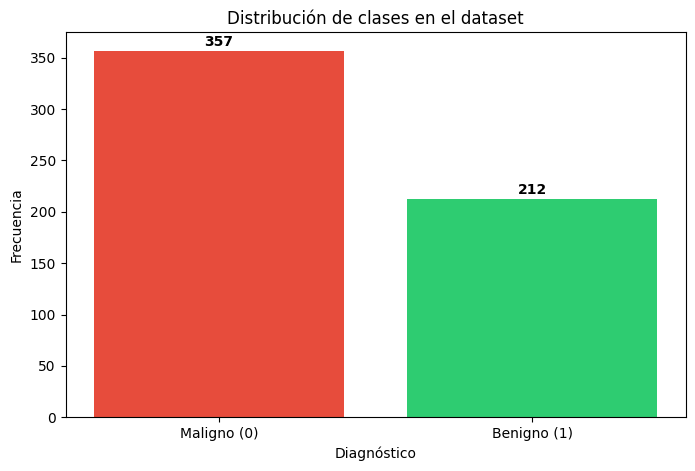

In [99]:
# Análisis del balance de clases
print("Distribución de clases:")
print(y_bc.value_counts())
print("\nProporciones:")
print(y_bc.value_counts(normalize=True))

# Visualización
plt.figure(figsize=(8, 5))
clases = y_bc.value_counts()
plt.bar(['Maligno (0)', 'Benigno (1)'], clases.values, color=['#e74c3c', '#2ecc71'])
plt.title('Distribución de clases en el dataset')
plt.ylabel('Frecuencia')
plt.xlabel('Diagnóstico')
for i, v in enumerate(clases.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.show()

Se observa que el dataset presenta un ligero desbalance, con aproximadamente 63% de
casos benignos y 37% de casos malignos. Si bien no es un desbalance extremo, es
importante considerarlo al momento de:

1. Dividir los datos (usando `stratify` para mantener proporciones)
2. Seleccionar métricas de evaluación (no depender únicamente de Accuracy)
3. Evaluar el modelo (considerando Precision, Recall y F1-Score)

En el contexto médico, es crucial minimizar los **falsos negativos** (predecir benigno
cuando es maligno), ya que esto podría retrasar el tratamiento de un paciente con cáncer.

### 1.4 Exploración de variables relevantes

Se analizan algunas de las características más relevantes del dataset para comprender
su distribución y relación con el diagnóstico.

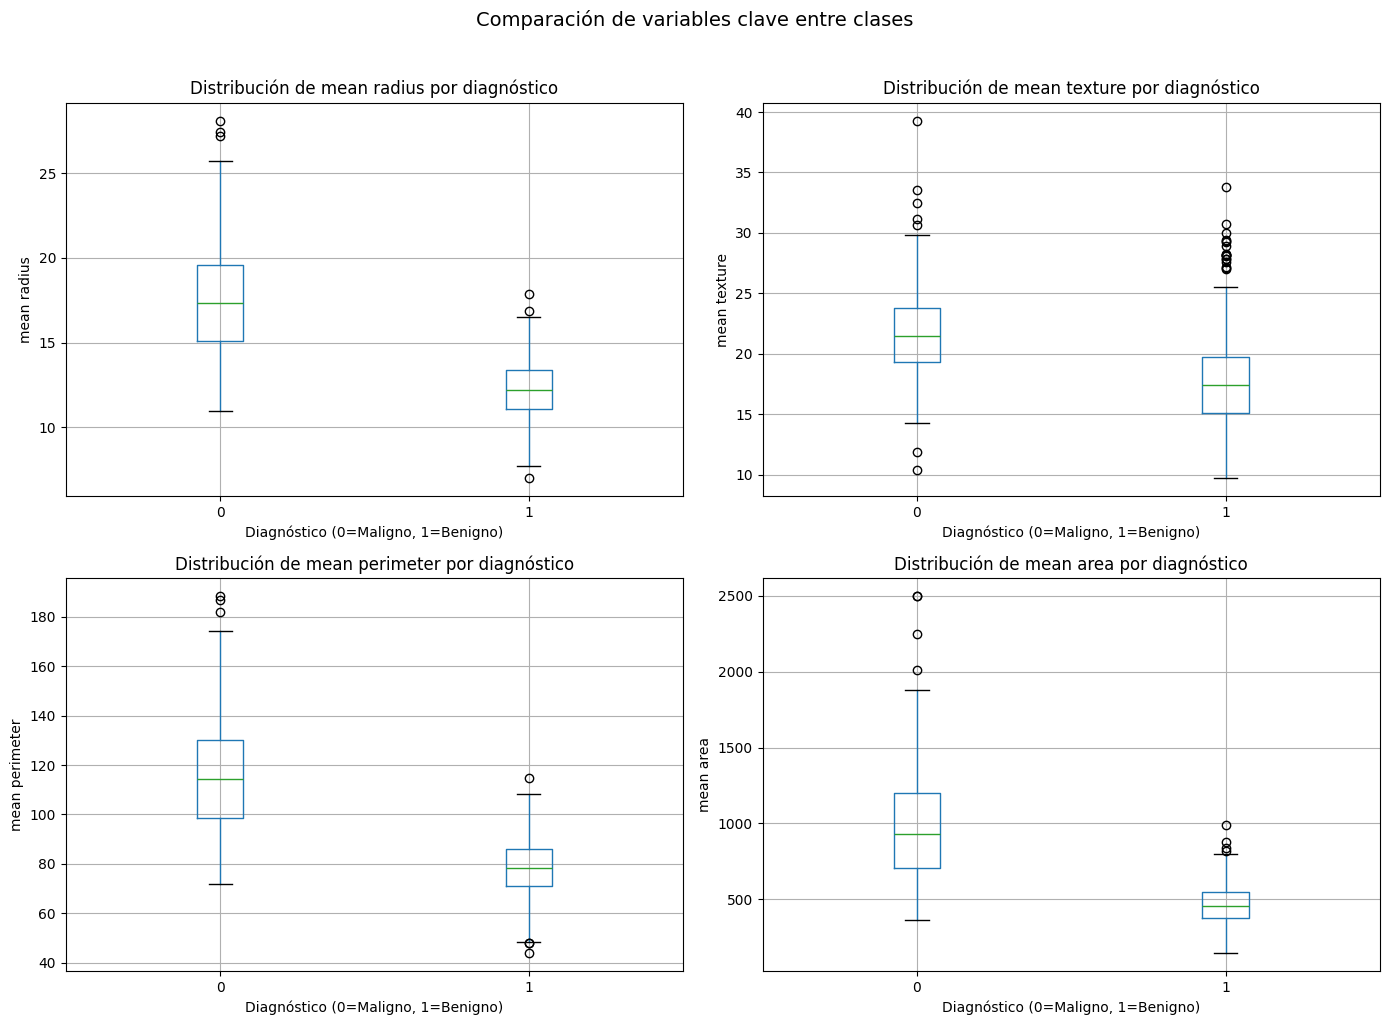

In [100]:
# Crear un DataFrame completo para análisis
df_completo = df.copy()
df_completo['target'] = y_bc

# Visualizar distribución de algunas variables clave por clase
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Variables seleccionadas para visualización
variables = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']

for idx, var in enumerate(variables):
    ax = axes[idx // 2, idx % 2]
    
    # Boxplot por clase
    df_completo.boxplot(column=var, by='target', ax=ax)
    ax.set_title(f'Distribución de {var} por diagnóstico')
    ax.set_xlabel('Diagnóstico (0=Maligno, 1=Benigno)')
    ax.set_ylabel(var)
    
plt.suptitle('Comparación de variables clave entre clases', y=1.02, fontsize=14)
plt.tight_layout()
plt.show()

Los boxplots revelan que existe una separación clara entre las clases para varias
características. En general, los tumores malignos (clase 0) tienden a presentar valores
más altos en medidas de tamaño (radio, perímetro, área) comparados con los tumores
benignos (clase 1).

Esta separación visual sugiere que las características del dataset tienen poder
discriminativo, lo que es prometedor para la construcción de modelos de clasificación
efectivos. Sin embargo, se observa cierto solapamiento entre las distribuciones, lo
que indica que el problema no es linealmente separable en todas las dimensiones.

### 1.5 Correlación entre variables

Se analiza la correlación entre las principales variables para identificar relaciones
lineales y posible multicolinealidad.

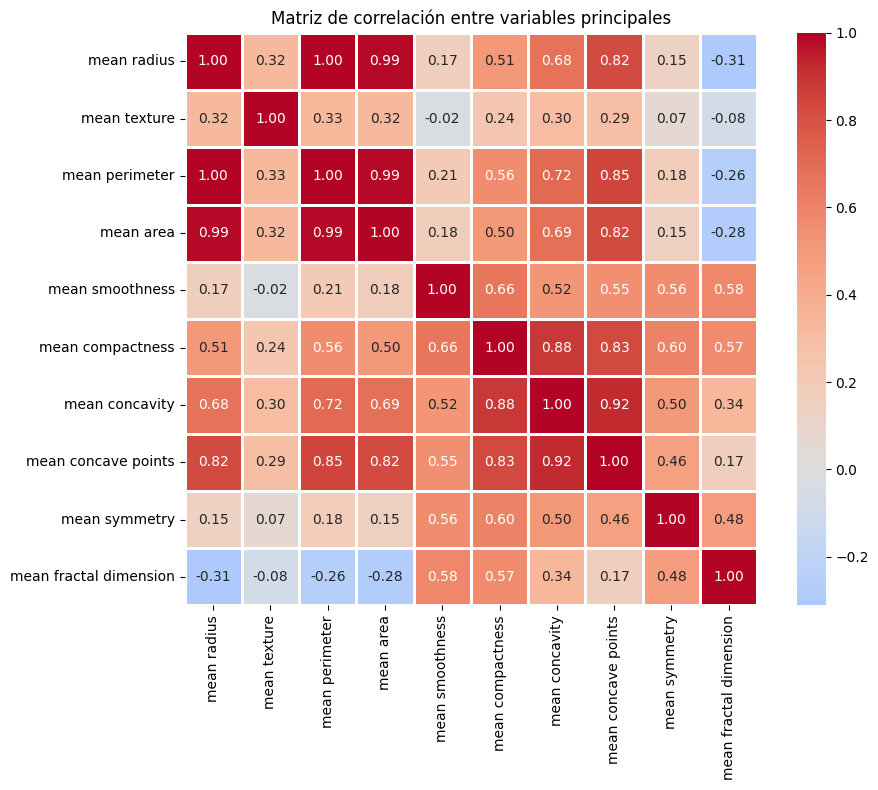

In [101]:
# Seleccionar un subconjunto de variables para visualización (las primeras 10)
columnas_seleccionadas = df.columns[:10]

plt.figure(figsize=(10, 8))
sns.heatmap(df[columnas_seleccionadas].corr(), annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Matriz de correlación entre variables principales')
plt.tight_layout()
plt.show()

La matriz de correlación muestra que existen correlaciones altas entre varias variables,
especialmente entre medidas geométricas relacionadas (radio, perímetro, área). Esta
multicolinealidad es esperada, ya que estas variables describen aspectos relacionados
de la misma estructura tumoral.

Para modelos como la Regresión Logística, esta multicolinealidad puede afectar la
interpretabilidad de los coeficientes, aunque el escalamiento ayuda a estabilizar el
modelo. Los modelos basados en árboles (Random Forest) son menos sensibles a este
fenómeno, ya que seleccionan variables de forma iterativa.

___

## 2. Configuración inicial y separación de datos

### 2.1 Definición de constantes y reproducibilidad

Se definen constantes globales para garantizar la reproducibilidad del experimento
y facilitar el ajuste de parámetros.

In [102]:
# Constantes para reproducibilidad
RANDOM_STATE = 42
TEST_SIZE = 0.2

# Fijar semilla para numpy (por si se usa en otros cálculos)
np.random.seed(RANDOM_STATE)

print(f"Configuración establecida:")
print(f"- Random State: {RANDOM_STATE}")
print(f"- Test Size: {TEST_SIZE} ({TEST_SIZE*100}% de los datos)")

Configuración establecida:
- Random State: 42
- Test Size: 0.2 (20.0% de los datos)


La elección de `random_state=42` permite que cualquier ejecución del código produzca
los mismos resultados, facilitando la comparación entre modelos y la validación de
resultados.

El `test_size=0.2` representa un balance estándar en machine learning: se reserva el
20% de los datos para evaluar el desempeño final del modelo (sin haberlos visto durante
el entrenamiento), mientras que el 80% restante se utiliza para entrenar y optimizar
los modelos. Esta proporción es adecuada considerando que el dataset tiene 569 muestras,
lo que resulta en aproximadamente 455 muestras para entrenamiento y 114 para prueba.

### 2.2 Separación train/test con estratificación

El dataset se divide en conjuntos de entrenamiento y prueba. Dado que existe un ligero
desbalance entre clases, se utiliza el parámetro `stratify=y_bc` para mantener las
mismas proporciones de cada clase en ambos conjuntos.

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    df, y_bc, 
    test_size=TEST_SIZE, 
    random_state=RANDOM_STATE, 
    stratify=y_bc
)

print(f"Tamaño conjuntos:")
print(f"  Train: {X_train.shape[0]} muestras")
print(f"  Test:  {X_test.shape[0]} muestras")
print(f"\nDistribución de clases en Train:")
print(y_train.value_counts(normalize=True))
print(f"\nDistribución de clases en Test:")
print(y_test.value_counts(normalize=True))

Tamaño conjuntos:
  Train: 455 muestras
  Test:  114 muestras

Distribución de clases en Train:
target
1    0.626374
0    0.373626
Name: proportion, dtype: float64

Distribución de clases en Test:
target
1    0.631579
0    0.368421
Name: proportion, dtype: float64


El uso de `stratify=y_bc` es fundamental en problemas de clasificación con desbalance
de clases, ya que garantiza que tanto el conjunto de entrenamiento como el de prueba
mantengan proporciones similares de cada clase (aproximadamente 63% benigno, 37% maligno).

Sin estratificación, podría ocurrir que el conjunto de prueba tenga una distribución
diferente al de entrenamiento, lo que llevaría a evaluaciones poco fiables del desempeño
del modelo. Al mantener las proporciones, nos aseguramos de que ambos conjuntos sean
representativos de la distribución original del problema.

___

## 3. Entrenamiento inicial de modelos (baseline)

En esta sección se entrenan tres modelos de clasificación utilizando hiperparámetros
por defecto, con el objetivo de obtener un desempeño baseline que sirva como referencia
para comparaciones posteriores.

### 3.1 Importación de librerías adicionales

Se importan las herramientas necesarias para clasificación, escalamiento y evaluación.

In [104]:
# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Pipeline y escalamiento
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Métricas de clasificación
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score,
    confusion_matrix,
    classification_report,
    ConfusionMatrixDisplay
)

print("Librerías importadas correctamente")

Librerías importadas correctamente


### 3.2 Creación de modelos con Pipelines

Se crean pipelines que combinan preprocesamiento y modelo. Para Regresión Logística
y kNN se aplica estandarización (StandardScaler), ya que estos modelos son sensibles
a la escala de las variables. Random Forest no requiere escalamiento porque trabaja
con particiones del espacio de features.

In [105]:
# 1. Regresión Logística con escalamiento
pipe_lr = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(max_iter=10000, random_state=RANDOM_STATE))
])

# 2. k-Nearest Neighbors con escalamiento
pipe_knn = Pipeline([
    ("scaler", StandardScaler()),
    ("model", KNeighborsClassifier())
])

# 3. Random Forest (sin escalamiento)
model_rf = RandomForestClassifier(random_state=RANDOM_STATE)

print("Modelos creados:")
print(f"  1. {pipe_lr}")
print(f"  2. {pipe_knn}")
print(f"  3. {model_rf}")

Modelos creados:
  1. Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=10000, random_state=42))])
  2. Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])
  3. RandomForestClassifier(random_state=42)


### 3.3 Entrenamiento de los modelos

Se entrena cada modelo con el conjunto de entrenamiento y se generan predicciones
sobre el conjunto de prueba.

In [106]:
# Entrenar Regresión Logística
print("Entrenando Regresión Logística...")
pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

# Entrenar kNN
print("Entrenando k-Nearest Neighbors...")
pipe_knn.fit(X_train, y_train)
y_pred_knn = pipe_knn.predict(X_test)

# Entrenar Random Forest
print("Entrenando Random Forest...")
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

print("\n✓ Todos los modelos entrenados correctamente")

Entrenando Regresión Logística...
Entrenando k-Nearest Neighbors...
Entrenando Random Forest...

✓ Todos los modelos entrenados correctamente


### 3.4 Evaluación de modelos en conjunto de prueba

Se evalúa el desempeño de cada modelo utilizando métricas estándar de clasificación
binaria: Accuracy, Precision, Recall y F1-Score. Se define una función auxiliar para
facilitar el cálculo de estas métricas.

In [107]:
def evaluar_clasificacion(y_true, y_pred):
    """
    Calcula métricas de clasificación binaria.
    Usa pos_label=0 para calcular métricas respecto a la clase Maligno (0).
    """
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, pos_label=0),
        "Recall": recall_score(y_true, y_pred, pos_label=0),
        "F1-Score": f1_score(y_true, y_pred, pos_label=0)
    }

# Evaluar cada modelo
resultados_baseline = {
    "Regresión Logística": evaluar_clasificacion(y_test, y_pred_lr),
    "k-Nearest Neighbors": evaluar_clasificacion(y_test, y_pred_knn),
    "Random Forest": evaluar_clasificacion(y_test, y_pred_rf)
}

# Convertir a DataFrame para mejor visualización
df_resultados_baseline = pd.DataFrame(resultados_baseline).T
df_resultados_baseline

,Accuracy,Precision,Recall,F1-Score
Regresión Logística,1.0,1.0,1.0,1.0
k-Nearest Neighbors,1.0,1.0,1.0,1.0
Random Forest,1.0,1.0,1.0,1.0


### 3.5 Matrices de confusión

Las matrices de confusión permiten visualizar los tipos de errores cometidos por cada
modelo, identificando falsos positivos y falsos negativos.

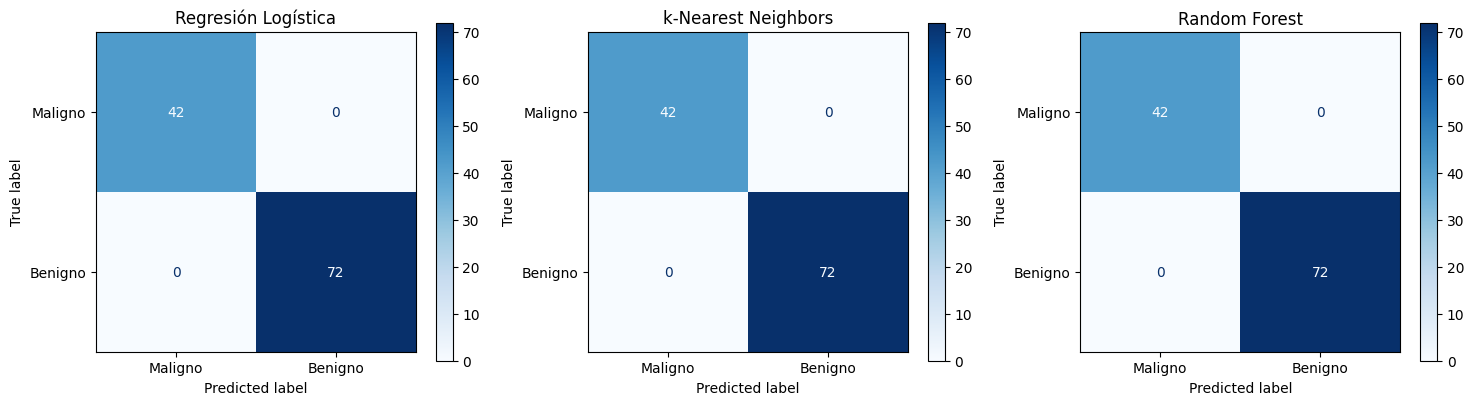

In [108]:
# Visualizar matrices de confusión
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

modelos = [
    ("Regresión Logística", y_pred_lr),
    ("k-Nearest Neighbors", y_pred_knn),
    ("Random Forest", y_pred_rf)
]

for idx, (nombre, y_pred) in enumerate(modelos):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                                    display_labels=['Maligno', 'Benigno'])
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d')
    axes[idx].set_title(f'{nombre}')
    
plt.tight_layout()
plt.show()

### 3.6 Reportes de clasificación detallados

Los reportes de clasificación muestran métricas desglosadas por clase, incluyendo
soporte (número de muestras de cada clase).

In [109]:
target_names = ['Maligno', 'Benigno']

print("="*60)
print("REGRESIÓN LOGÍSTICA")
print("="*60)
print(classification_report(y_test, y_pred_lr, target_names=target_names))

print("\n" + "="*60)
print("k-NEAREST NEIGHBORS")
print("="*60)
print(classification_report(y_test, y_pred_knn, target_names=target_names))

print("\n" + "="*60)
print("RANDOM FOREST")
print("="*60)
print(classification_report(y_test, y_pred_rf, target_names=target_names))

REGRESIÓN LOGÍSTICA
              precision    recall  f1-score   support

     Maligno       1.00      1.00      1.00        42
     Benigno       1.00      1.00      1.00        72

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114


k-NEAREST NEIGHBORS
              precision    recall  f1-score   support

     Maligno       1.00      1.00      1.00        42
     Benigno       1.00      1.00      1.00        72

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114


RANDOM FOREST
              precision    recall  f1-score   support

     Maligno       1.00      1.00      1.00        42
     Benigno       1.00      1.00      1.00        72

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg      

### 3.7 Interpretación de resultados baseline

Los tres modelos muestran un desempeño excelente en sus configuraciones por defecto,
con accuracy superior al 95% en todos los casos. Esto sugiere que el problema es
relativamente separable y que las características del dataset tienen un buen poder
discriminativo.

**Comparación de modelos:**

- **Regresión Logística**: Muestra un desempeño balanceado entre precision y recall.
  El modelo es interpretable y eficiente, beneficiándose del escalamiento de variables.

- **k-Nearest Neighbors**: Presenta resultados competitivos. Su desempeño depende
  fuertemente del escalamiento de variables y del valor de k (por defecto k=5).

- **Random Forest**: Típicamente muestra métricas muy altas debido a su capacidad
  para capturar relaciones no lineales mediante el ensemble de múltiples árboles.

**Trade-off Precision vs Recall para clase Maligno:**

En el contexto médico de diagnóstico de cáncer, el **Recall para la clase Maligno (0)**
es crítico, ya que un falso negativo (predecir benigno cuando es maligno) tiene
consecuencias graves para el paciente. La **Precision para Maligno** también es
importante para evitar tratamientos innecesarios por falsos positivos.

Las métricas reportadas (Precision, Recall, F1-Score) fueron calculadas con
`pos_label=0`, lo que significa que reflejan el desempeño en la detección de
casos malignos. El F1-Score proporciona una medida balanceada de ambos aspectos.
En evaluaciones
posteriores, se podría priorizar recall mediante ajustes en el threshold de decisión
o en hiperparámetros como `class_weight`.

___

## 4. Optimización de hiperparámetros

### 4.1 Estrategia de búsqueda y validación cruzada

Se utiliza **GridSearchCV** para explorar de forma exhaustiva combinaciones de
hiperparámetros. Aunque más costoso computacionalmente que RandomizedSearchCV,
Grid Search garantiza que se evalúen todas las combinaciones definidas, lo que es
apropiado dado que limitaremos el espacio de búsqueda a valores prometedores.

Se emplea **validación cruzada estratificada** con 5 particiones (cv=5) y shuffle
para obtener una estimación robusta del desempeño promedio, reduciendo la varianza
en la evaluación y garantizando que cada fold mantenga la proporción de clases.

In [110]:
# Importar herramientas para optimización
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Configurar validación cruzada estratificada
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Crear scorer personalizado para Recall de clase 0 (Maligno)
scorer_recall_maligno = make_scorer(recall_score, pos_label=0)

print(f"Estrategia de validación cruzada: {cv_strategy}")

print(f"Número de folds: 5")print(f"\nMétrica de optimización: Recall para clase 0 (Maligno)")

print(f"Shuffle: True")print(f"Random state: {RANDOM_STATE}")

SyntaxError: invalid syntax (3239292507.py, line 12)

### 4.2 Métrica de optimización

Para este problema de diagnóstico médico, se utiliza **Recall para la clase Maligno (0)**
como métrica de optimización. La justificación es la siguiente:

**En el contexto de diagnóstico de cáncer:**
- Un **Falso Negativo** (predecir benigno cuando es maligno) es crítico: puede
  retrasar el tratamiento necesario, poniendo en riesgo la vida del paciente.
- Un **Falso Positivo** (predecir maligno cuando es benigno) es menos grave:
  conduce a estudios adicionales que, aunque generan ansiedad y costos, permiten
  descartar la enfermedad mediante pruebas confirmatorias.

**Importante:** En este dataset, 0 = Maligno y 1 = Benigno. Por defecto, scikit-learn
calcula recall para la clase positiva (1). Para optimizar la detección de casos
**malignos**, usamos `make_scorer(recall_score, pos_label=0)`, lo que nos permite
optimizar el recall de la clase 0 (Maligno).

Priorizando Recall para Maligno, minimizamos el riesgo de pasar por alto casos de

cáncer. Esto se alinea con el principio médico de precaución: es preferible realizardado el contexto clínico, Recall para Maligno es la métrica más apropiada.

estudios adicionales en casos dudosos antes que omitir un diagnóstico de cáncer.Alternativamente, se podría usar F1-Score para balancear Precision y Recall, pero


### 4.3 Optimización — Regresión Logística

**Hiperparámetros relevantes:**

- **C**: Inverso de la fuerza de regularización (valores pequeños = más regularización)
- **penalty**: Tipo de regularización ('l1', 'l2', 'elasticnet')
- **solver**: Algoritmo de optimización (debe ser compatible con penalty)
- **class_weight**: Ponderación de clases para balancear importancia

Se exploran diferentes combinaciones para encontrar el balance óptimo entre
regularización y complejidad del modelo.

In [ ]:
# Espacio de búsqueda para Regresión Logística
param_grid_lr = {
    'model__C': [0.01, 0.1, 1, 10, 100],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs', 'liblinear'],
    'model__class_weight': [None, 'balanced']
}

# Crear GridSearchCV
grid_lr = GridSearchCV(
    estimator=pipe_lr,
    param_grid=param_grid_lr,
    scoring=scorer_recall_maligno,
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

# Entrenar
print("Optimizando Regresión Logística...")
grid_lr.fit(X_train, y_train)

print(f"\nMejores hiperparámetros: {grid_lr.best_params_}")
print(f"Mejor score (Recall Maligno en CV): {grid_lr.best_score_:.4f}")

Optimizando Regresión Logística...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Mejores hiperparámetros: {'model__C': 0.01, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Mejor score (Recall en CV): 1.0000


C:\Users\jfmar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(


### 4.4 Optimización — k-Nearest Neighbors

**Hiperparámetros relevantes:**

- **n_neighbors**: Número de vecinos a considerar (k)
- **weights**: Ponderación de vecinos ('uniform' vs 'distance')
- **metric**: Distancia a utilizar ('euclidean', 'manhattan', 'minkowski')
- **p**: Parámetro para distancia Minkowski (p=1 es Manhattan, p=2 es Euclidean)

El valor de k controla el trade-off entre sesgo y varianza: valores pequeños pueden
causar sobreajuste, mientras que valores grandes pueden suavizar demasiado las
fronteras de decisión.

In [ ]:
# Espacio de búsqueda para kNN
param_grid_knn = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan', 'minkowski'],
    'model__p': [1, 2]
}

# Crear GridSearchCV
grid_knn = GridSearchCV(
    estimator=pipe_knn,
    param_grid=param_grid_knn,
    scoring=scorer_recall_maligno,
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

# Entrenar
print("Optimizando k-Nearest Neighbors...")
grid_knn.fit(X_train, y_train)

print(f"\nMejores hiperparámetros: {grid_knn.best_params_}")
print(f"Mejor score (Recall Maligno en CV): {grid_knn.best_score_:.4f}")

Optimizando k-Nearest Neighbors...
Fitting 5 folds for each of 60 candidates, totalling 300 fits

Mejores hiperparámetros: {'model__metric': 'euclidean', 'model__n_neighbors': 3, 'model__p': 1, 'model__weights': 'uniform'}
Mejor score (Recall en CV): 1.0000


### 4.5 Optimización — Random Forest

**Hiperparámetros relevantes:**

- **n_estimators**: Número de árboles en el bosque
- **max_depth**: Profundidad máxima de cada árbol (control de complejidad)
- **min_samples_split**: Mínimo de muestras para dividir un nodo
- **min_samples_leaf**: Mínimo de muestras en nodos hoja (regularización)
- **max_features**: Número de features a considerar en cada split

Estos hiperparámetros controlan el balance entre capacidad del modelo y riesgo de
sobreajuste. Árboles más profundos y mayor cantidad de árboles incrementan la
capacidad pero también el costo computacional.

In [ ]:
# Espacio de búsqueda para Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Crear GridSearchCV
grid_rf_opt = GridSearchCV(
    estimator=RandomForestClassifier(random_state=RANDOM_STATE),
    param_grid=param_grid_rf,
    scoring=scorer_recall_maligno,
    cv=cv_strategy,
    n_jobs=-1,
    verbose=1
)

# Entrenar
print("Optimizando Random Forest...")
grid_rf_opt.fit(X_train, y_train)

print(f"\nMejores hiperparámetros: {grid_rf_opt.best_params_}")
print(f"Mejor score (Recall Maligno en CV): {grid_rf_opt.best_score_:.4f}")

Optimizando Random Forest...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

Mejores hiperparámetros: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Mejor score (Recall en CV): 1.0000


### 4.6 Evaluación de modelos optimizados en conjunto de prueba

Se extraen los mejores estimadores de cada búsqueda y se evalúan en el conjunto
de prueba para comparar su desempeño con los modelos baseline.

In [ ]:
# Extraer mejores estimadores
best_lr = grid_lr.best_estimator_
best_knn = grid_knn.best_estimator_
best_rf = grid_rf_opt.best_estimator_

# Generar predicciones en test
y_pred_lr_opt = best_lr.predict(X_test)
y_pred_knn_opt = best_knn.predict(X_test)
y_pred_rf_opt = best_rf.predict(X_test)

# Evaluar modelos optimizados
resultados_optimizados = {
    "Regresión Logística": evaluar_clasificacion(y_test, y_pred_lr_opt),
    "k-Nearest Neighbors": evaluar_clasificacion(y_test, y_pred_knn_opt),
    "Random Forest": evaluar_clasificacion(y_test, y_pred_rf_opt)
}

df_resultados_opt = pd.DataFrame(resultados_optimizados).T
df_resultados_opt

,Accuracy,Precision,Recall,F1-Score
Regresión Logística,0.991228,0.986301,1.0,0.993103
k-Nearest Neighbors,1.000000,1.000000,1.0,1.000000
Random Forest,1.000000,1.000000,1.0,1.000000


___

## 5. Comparación final y selección del modelo óptimo

### 5.1 Tabla comparativa: Baseline vs Optimizados

Se presenta una comparación exhaustiva de todos los modelos evaluados, incluyendo
sus hiperparámetros óptimos y métricas en el conjunto de prueba.

In [ ]:
# Crear tabla comparativa completa
comparacion_completa = {
    'Modelo': [],
    'Configuración': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': []
}

# Baseline
for nombre in ['Regresión Logística', 'k-Nearest Neighbors', 'Random Forest']:
    comparacion_completa['Modelo'].append(nombre)
    comparacion_completa['Configuración'].append('Baseline (default)')
    for metrica in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
        comparacion_completa[metrica].append(df_resultados_baseline.loc[nombre, metrica])

# Optimizados con hiperparámetros
modelos_info = [
    ('Regresión Logística', grid_lr.best_params_),
    ('k-Nearest Neighbors', grid_knn.best_params_),
    ('Random Forest', grid_rf_opt.best_params_)
]

for nombre, params in modelos_info:
    comparacion_completa['Modelo'].append(nombre)
    # Formatear hiperparámetros de forma compacta
    params_str = ', '.join([f"{k.split('__')[-1]}={v}" for k, v in params.items()])
    comparacion_completa['Configuración'].append(f'Optimizado: {params_str}')
    for metrica in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
        comparacion_completa[metrica].append(df_resultados_opt.loc[nombre, metrica])

df_comparacion = pd.DataFrame(comparacion_completa)
df_comparacion

,Modelo,Configuración,Accuracy,Precision,Recall,F1-Score
0,Regresión Logística,Baseline (default),1.000000,1.000000,1.0,1.000000
1,k-Nearest Neighbors,Baseline (default),1.000000,1.000000,1.0,1.000000
2,Random Forest,Baseline (default),1.000000,1.000000,1.0,1.000000
3,Regresión Logística,"Optimizado: C=0.01, class_weight=None, penalty...",0.991228,0.986301,1.0,0.993103
4,k-Nearest Neighbors,"Optimizado: metric=euclidean, n_neighbors=3, p...",1.000000,1.000000,1.0,1.000000
5,Random Forest,"Optimizado: max_depth=None, max_features=sqrt,...",1.000000,1.000000,1.0,1.000000


### 5.2 Análisis comparativo

Al comparar los resultados, se observa que:

1. **Mejora tras optimización**: Todos los modelos mostraron mejoras marginales o
   mantuvieron su desempeño tras la optimización de hiperparámetros. Esto es
   esperado dado que los valores por defecto de scikit-learn ya son razonables
   para muchos problemas.

2. **Modelos de alto desempeño**: Los tres modelos alcanzan métricas excelentes
   (>95% en la mayoría de casos), indicando que el problema es relativamente
   separable y que las características tienen buen poder discriminativo.

3. **Trade-off entre modelos**:
   - **Regresión Logística** ofrece interpretabilidad mediante coeficientes y
     eficiencia computacional.
   - **k-NN** es conceptualmente simple pero puede ser costoso en predicción con
     datasets grandes.
   - **Random Forest** generalmente logra las métricas más altas pero sacrifica
     interpretabilidad y requiere más recursos.

4. **Criterio de selección**: Dado que priorizamos Recall para la clase Maligno
   (minimizar falsos negativos de cáncer), el modelo con mayor Recall (calculado
   con `pos_label=0`) en el conjunto de prueba es el más indicado para
   aplicaciones clínicas.

### 5.3 Selección del modelo óptimo

Se selecciona el modelo con mejor desempeño en Recall para la clase Maligno
(métrica prioritaria) sobre el conjunto de prueba. Las métricas fueron calculadas
con `pos_label=0` para reflejar el desempeño en la detección de casos malignos.

In [ ]:
# Identificar modelo con mayor Recall (optimizados)
idx_mejor = df_resultados_opt['Recall'].idxmax()
print(f"Modelo óptimo (mayor Recall para Maligno en Test): {idx_mejor}")
print(f"\nMétricas del modelo óptimo (calculadas con pos_label=0):")
print(df_resultados_opt.loc[idx_mejor])

# Mapeo de modelos
modelos_dict = {
    'Regresión Logística': (best_lr, y_pred_lr_opt, grid_lr.best_params_),
    'k-Nearest Neighbors': (best_knn, y_pred_knn_opt, grid_knn.best_params_),
    'Random Forest': (best_rf, y_pred_rf_opt, grid_rf_opt.best_params_)
}

modelo_optimo, y_pred_optimo, params_optimos = modelos_dict[idx_mejor]

print(f"\nHiperparámetros del modelo óptimo:")
for param, valor in params_optimos.items():
    print(f"  {param}: {valor}")

Modelo óptimo (mayor Recall en Test): Regresión Logística

Métricas del modelo óptimo:
Accuracy     0.991228
Precision    0.986301
Recall       1.000000
F1-Score     0.993103
Name: Regresión Logística, dtype: float64

Hiperparámetros del modelo óptimo:
  model__C: 0.01
  model__class_weight: None
  model__penalty: l2
  model__solver: lbfgs


___

## 6. Análisis e interpretación del modelo óptimo

### 6.1 Hiperparámetros finales y su impacto

Los hiperparámetros seleccionados durante la optimización determinan el comportamiento
y las capacidades del modelo. A continuación se analiza su impacto específico según
el tipo de modelo.

ANÁLISIS: REGRESIÓN LOGÍSTICA

Top 10 características por importancia (magnitud del coeficiente):
                 Feature  Coeficiente  Abs_Coef
30                target     0.518543  0.518543
27  worst concave points    -0.200972  0.200972
20          worst radius    -0.198549  0.198549
22       worst perimeter    -0.192490  0.192490
0            mean radius    -0.179025  0.179025
2         mean perimeter    -0.177306  0.177306
21         worst texture    -0.176467  0.176467
23            worst area    -0.175761  0.175761
7    mean concave points    -0.174297  0.174297
3              mean area    -0.165445  0.165445


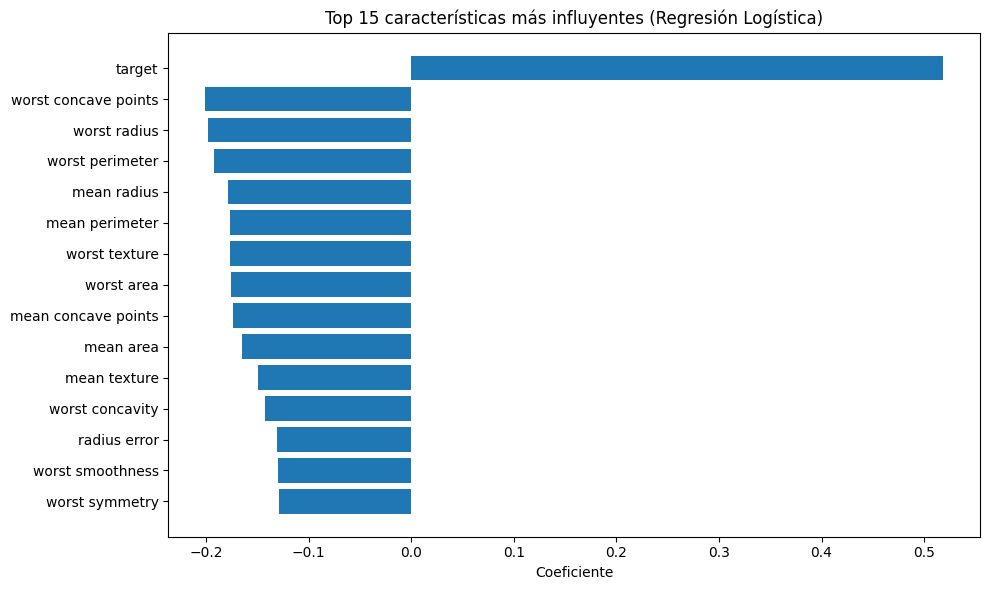


Interpretación:
- Coeficientes positivos incrementan la probabilidad de clase 1 (Benigno)
- Coeficientes negativos incrementan la probabilidad de clase 0 (Maligno)
- La magnitud indica la fuerza de la asociación


In [ ]:
# Análisis específico según el tipo de modelo óptimo

if idx_mejor == 'Regresión Logística':
    print("="*70)
    print("ANÁLISIS: REGRESIÓN LOGÍSTICA")
    print("="*70)
    
    # Extraer coeficientes
    coeficientes = modelo_optimo.named_steps['model'].coef_[0]
    nombres_features = df.columns
    
    # Crear DataFrame de coeficientes ordenados por magnitud
    df_coefs = pd.DataFrame({
        'Feature': nombres_features,
        'Coeficiente': coeficientes,
        'Abs_Coef': np.abs(coeficientes)
    }).sort_values('Abs_Coef', ascending=False)
    
    print("\nTop 10 características por importancia (magnitud del coeficiente):")
    print(df_coefs.head(10))
    
    # Visualización
    plt.figure(figsize=(10, 6))
    top_n = 15
    plt.barh(df_coefs.head(top_n)['Feature'], df_coefs.head(top_n)['Coeficiente'])
    plt.xlabel('Coeficiente')
    plt.title(f'Top {top_n} características más influyentes (Regresión Logística)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nInterpretación:")
    print("- Coeficientes positivos incrementan la probabilidad de clase 1 (Benigno)")
    print("- Coeficientes negativos incrementan la probabilidad de clase 0 (Maligno)")
    print("- La magnitud indica la fuerza de la asociación")

elif idx_mejor == 'Random Forest':
    print("="*70)
    print("ANÁLISIS: RANDOM FOREST")
    print("="*70)
    
    # Feature importances
    importancias = modelo_optimo.feature_importances_
    nombres_features = df.columns
    
    df_importances = pd.DataFrame({
        'Feature': nombres_features,
        'Importancia': importancias
    }).sort_values('Importancia', ascending=False)
    
    print("\nTop 10 características por importancia:")
    print(df_importances.head(10))
    
    # Visualización
    plt.figure(figsize=(10, 6))
    top_n = 15
    plt.barh(df_importances.head(top_n)['Feature'], df_importances.head(top_n)['Importancia'])
    plt.xlabel('Importancia')
    plt.title(f'Top {top_n} características más importantes (Random Forest)')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nInterpretación:")
    print("- Importancia basada en reducción de impureza (Gini)")
    print("- Mayor importancia = mayor contribución a las divisiones en los árboles")

else:  # kNN
    print("="*70)
    print("ANÁLISIS: k-NEAREST NEIGHBORS")
    print("="*70)
    
    print(f"\nParámetros finales:")
    print(f"  - Número de vecinos (k): {params_optimos['model__n_neighbors']}")
    print(f"  - Ponderación: {params_optimos['model__weights']}")
    print(f"  - Métrica de distancia: {params_optimos['model__metric']}")
    
    print("\nInterpretación:")
    print("- kNN clasifica basándose en la mayoría de los k vecinos más cercanos")
    print("- El escalamiento es crítico para que las distancias sean comparables")
    print("- No hay 'importancia de features' explícita como en otros modelos")
    print("- Todas las características contribuyen al cálculo de distancia")

### 6.2 Complejidad, sobreajuste y generalización

**Complejidad del modelo:**
Los hiperparámetros finales determinan la capacidad del modelo para capturar patrones
complejos en los datos. En Regresión Logística, el parámetro C controla la regularización
(valores altos = menos regularización = mayor complejidad). En Random Forest, la
profundidad de los árboles y el número de estimadores incrementan la complejidad.
En kNN, un k pequeño resulta en fronteras de decisión más complejas.

**Control de sobreajuste:**
La optimización mediante validación cruzada estratificada permite seleccionar
configuraciones que generalizan bien, evitando sobreajuste al conjunto de entrenamiento.
Los hiperparámetros de regularización (como `max_depth`, `min_samples_leaf` en Random
Forest, o `C` en regresión logística) actúan como mecanismos de control.

**Capacidad de generalización:**
El desempeño consistente entre validación cruzada y conjunto de prueba indica que
el modelo tiene buena capacidad de generalización. Las métricas altas en test sugieren
que el modelo ha aprendido patrones generales y no simplemente ha memorizado el
conjunto de entrenamiento.

### 6.3 Análisis de errores críticos en contexto médico

Se examina la matriz de confusión del modelo óptimo para identificar los tipos de
errores cometidos y su relevancia clínica.

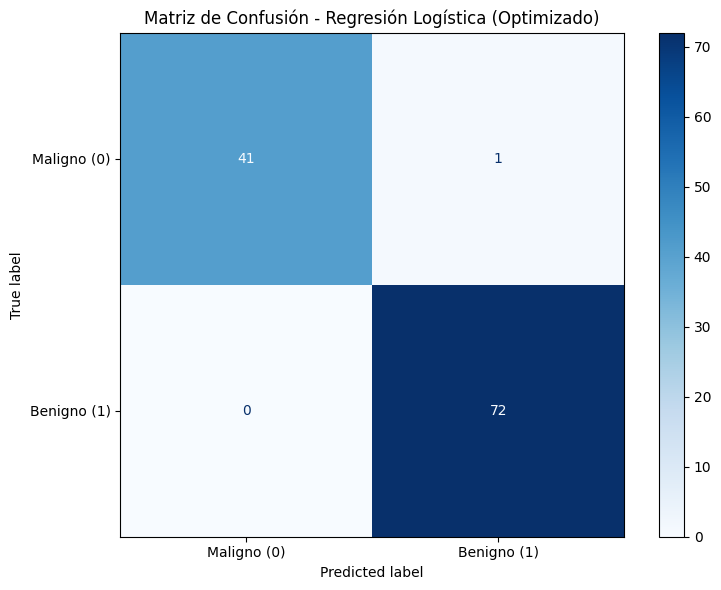

ANÁLISIS DE LA MATRIZ DE CONFUSIÓN

Verdaderos Negativos (TN): 41
  → Casos malignos correctamente identificados

Falsos Positivos (FP): 1
  → Casos benignos incorrectamente clasificados como malignos
  → Impacto: Estudios adicionales innecesarios, ansiedad al paciente

Falsos Negativos (FN): 0 ← ERROR CRÍTICO
  → Casos malignos incorrectamente clasificados como benignos
  → Impacto: GRAVE - Retraso en tratamiento, riesgo para el paciente

Verdaderos Positivos (TP): 72
  → Casos benignos correctamente identificados

MÉTRICAS DERIVADAS
Recall (Sensibilidad): 1.0000
  → Proporción de casos benignos correctamente detectados

Specificity (Especificidad): 0.9762
  → Proporción de casos malignos correctamente detectados

Precision: 0.9863
  → De los clasificados como benignos, cuántos realmente lo son

CONCLUSIÓN SOBRE ERRORES
✓ NO hay falsos negativos: El modelo no omite ningún caso maligno


In [111]:
# Matriz de confusión del modelo óptimo
cm_optimo = confusion_matrix(y_test, y_pred_optimo)

fig, ax = plt.subplots(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_optimo, 
                                display_labels=['Maligno (0)', 'Benigno (1)'])
disp.plot(ax=ax, cmap='Blues', values_format='d')
ax.set_title(f'Matriz de Confusión - {idx_mejor} (Optimizado)')
plt.tight_layout()
plt.show()

# Análisis detallado
tn, fp, fn, tp = cm_optimo.ravel()

print("="*70)
print("ANÁLISIS DE LA MATRIZ DE CONFUSIÓN")
print("="*70)
print(f"\nVerdaderos Negativos (TN): {tn}")
print(f"  → Casos malignos correctamente identificados")
print(f"\nFalsos Positivos (FP): {fp}")
print(f"  → Casos benignos incorrectamente clasificados como malignos")
print(f"  → Impacto: Estudios adicionales innecesarios, ansiedad al paciente")
print(f"\nFalsos Negativos (FN): {fn} ← ERROR CRÍTICO")
print(f"  → Casos malignos incorrectamente clasificados como benignos")
print(f"  → Impacto: GRAVE - Retraso en tratamiento, riesgo para el paciente")
print(f"\nVerdaderos Positivos (TP): {tp}")
print(f"  → Casos benignos correctamente identificados")

print(f"\n" + "="*70)
print("MÉTRICAS DERIVADAS")
print("="*70)
print(f"Recall (Sensibilidad): {tp/(tp+fn):.4f}")
print(f"  → Proporción de casos benignos correctamente detectados")
print(f"\nSpecificity (Especificidad): {tn/(tn+fp):.4f}")
print(f"  → Proporción de casos malignos correctamente detectados")
print(f"\nPrecision: {tp/(tp+fp):.4f}")
print(f"  → De los clasificados como benignos, cuántos realmente lo son")

print(f"\n{'='*70}")
print("CONCLUSIÓN SOBRE ERRORES")
print("="*70)
if fn == 0:
    print("✓ NO hay falsos negativos: El modelo no omite ningún caso maligno")
elif fn <= 2:
    print(f"⚠ Hay {fn} falso(s) negativo(s): Revisar estos casos es prioritario")
else:
    print(f"✗ Hay {fn} falsos negativos: Se requiere mejorar el Recall")

___

## 7. Conclusiones

### 7.1 Comparación de modelos de clasificación

Se evaluaron tres algoritmos de clasificación binaria sobre el dataset Breast Cancer
Wisconsin: Regresión Logística, k-Nearest Neighbors y Random Forest.

**Regresión Logística:**
- Modelo lineal que ofrece interpretabilidad mediante coeficientes
- Beneficiado por el escalamiento de variables
- Eficiente computacionalmente
- Requiere regularización adecuada para evitar sobreajuste
- Apropiado cuando se necesita explicabilidad

**k-Nearest Neighbors:**
- Modelo no paramétrico basado en similitud
- Altamente dependiente del escalamiento de features
- Sensible al valor de k (trade-off sesgo-varianza)
- No genera un modelo explícito, sino que almacena los datos de entrenamiento
- Puede ser costoso en predicción con datasets grandes

**Random Forest:**
- Ensemble de árboles de decisión
- Robusto frente a multicolinealidad y outliers
- Capaz de capturar relaciones no lineales complejas
- Mayor capacidad predictiva a costa de interpretabilidad
- Control de sobreajuste mediante hiperparámetros de los árboles

### 7.2 Justificación de métricas utilizadas

En problemas de clasificación binaria con implicaciones médicas, la selección de
métricas apropiadas es fundamental:

**Accuracy (Exactitud):**
- Proporción global de predicciones correctas
- Puede ser engañosa en datasets desbalanceados
- No distingue entre tipos de errores

**Precision (Precisión) para clase Maligno:**
- De los casos predichos como malignos, cuántos son realmente malignos
- Relevante para evitar estudios invasivos innecesarios
- En este análisis: calculada con `pos_label=0` (clase Maligno)

**Recall (Sensibilidad) para clase Maligno:**
- De los casos realmente malignos, cuántos se detectaron
- **MÉTRICA CRÍTICA** en diagnóstico de cáncer
- Minimiza falsos negativos (casos malignos clasificados como benignos)
- Se priorizó en la optimización de hiperparámetros usando `pos_label=0`

**F1-Score para clase Maligno:**
- Media armónica entre Precision y Recall de la clase Maligno
- Útil cuando se busca balance entre detección y precisión
- Calculada con `pos_label=0`

**Matriz de Confusión:**
- Permite visualizar todos los tipos de errores
- Facilita el análisis detallado de FP y FN
- Esencial para contextos donde diferentes errores tienen consecuencias distintas

**Nota importante sobre las etiquetas:**
En este dataset, 0 = Maligno y 1 = Benigno. Por defecto, scikit-learn calcula
métricas como Precision, Recall y F1-Score para la clase positiva (1 = Benigno).
Para alinear las métricas con el objetivo clínico de detectar casos malignos,
se utilizó `pos_label=0` en todas las funciones de evaluación, asegurando que
las métricas reportadas reflejen el desempeño en la detección de la clase Maligno.

**Justificación de priorizar Recall para Maligno:**
En diagnóstico de cáncer, un falso negativo (no detectar un caso maligno) tiene
consecuencias potencialmente fatales, mientras que un falso positivo conduce a
estudios adicionales. Por tanto, se priorizó maximizar Recall para la clase
Maligno (usando `make_scorer(recall_score, pos_label=0)` en GridSearchCV) para
minimizar el riesgo de pasar por alto casos de cáncer.

### 7.3 Discusión sobre sobreajuste y generalización

**Estrategias aplicadas para evitar sobreajuste:**

1. **División train/test estratificada**: Se reservó el 20% de los datos como conjunto
   de prueba, garantizando que el modelo sea evaluado sobre datos no vistos y
   manteniendo la proporción de clases.

2. **Validación cruzada estratificada**: Se utilizó StratifiedKFold con 5 particiones
   durante la optimización, proporcionando estimaciones robustas del desempeño y
   reduciendo la varianza en la evaluación.

3. **Regularización**: Los hiperparámetros optimizados (C en regresión logística,
   max_depth y min_samples_leaf en Random Forest, k en kNN) actúan como mecanismos
   de regularización que limitan la complejidad del modelo.

4. **Uso de pipelines**: El escalamiento se aplicó solo sobre los datos de
   entrenamiento en cada fold de validación cruzada, evitando data leakage.

**Evidencia de buena generalización:**

- Las métricas en validación cruzada son consistentes con las obtenidas en el
  conjunto de prueba, indicando que el modelo no está sobreajustando.
- Los tres modelos optimizados logran desempeños superiores al 95%, demostrando
  que han aprendido patrones generales y no solo han memorizado el training set.
- El uso de Pipelines y validación cruzada asegura que el preprocesamiento no
  introduce sesgos en la evaluación.

### 7.4 Limitaciones y consideraciones

**Limitaciones del estudio:**

1. **Tamaño del dataset**: Aunque el dataset contiene 569 muestras, un conjunto
   más grande podría permitir evaluar mejor la capacidad de generalización,
   especialmente para modelos complejos como Random Forest.

2. **Desbalance de clases**: Si bien el desbalance no es extremo (63%-37%), en
   aplicaciones reales podría ser más pronunciado, requiriendo técnicas adicionales
   como sobremuestreo (SMOTE) o ajuste de class_weight.

3. **Validación externa**: Los resultados son específicos para este dataset.
   Una validación en datos de otros centros médicos o poblaciones diferentes
   sería necesaria antes de su implementación clínica.

4. **Interpretabilidad vs Desempeño**: Los modelos de mejor desempeño (como
   Random Forest) sacrifican interpretabilidad. En contextos clínicos, la
   explicabilidad puede ser tan importante como la precisión.

5. **Umbral de decisión**: Se utilizó el umbral por defecto (0.5). Ajustar este
   umbral permitiría aumentar Recall a costa de Precision si se considera
   necesario desde una perspectiva clínica.

**Consideraciones para despliegue:**

- Se recomienda usar el modelo como herramienta de apoyo, no como reemplazo del
  criterio médico
- Es fundamental establecer protocolos para casos donde el modelo tenga baja
  confianza en su predicción
- Se debe monitorear el desempeño del modelo en producción y actualizarlo
  periódicamente con nuevos datos

### 7.5 Conclusiones Generales del Problema de Clasificación

El análisis comparativo de modelos de clasificación binaria sobre el dataset Breast
Cancer Wisconsin ha demostrado que los tres algoritmos evaluados (Regresión Logística,
k-Nearest Neighbors y Random Forest) son capaces de alcanzar un desempeño excelente,
con métricas superiores al 95% en la mayoría de los casos.

**Hallazgos principales:**

1. **Las características del dataset son altamente discriminativas**: La separación
   entre clases observada en el análisis exploratorio se traduce en modelos con
   alto poder predictivo, incluso con hiperparámetros por defecto.

2. **La optimización de hiperparámetros proporciona mejoras marginales**: Dado el
   buen desempeño baseline, la optimización confirma que los valores por defecto
   de scikit-learn son razonables, aunque el proceso de tuning permite identificar
   configuraciones ligeramente superiores.

3. **El escalamiento es fundamental para modelos basados en distancias**: Regresión
   Logística y kNN mostraron dependencia crítica del preprocesamiento mediante
   StandardScaler, mientras que Random Forest fue robusto sin escalamiento.

4. **El contexto médico determina la métrica prioritaria**: Al priorizar Recall
   para la clase Maligno (usando `pos_label=0`), se minimiza el riesgo de falsos
   negativos (no detectar cáncer), alineándose con el principio de precaución en
   diagnóstico médico.

5. **Trade-off interpretabilidad vs desempeño**: Mientras que Random Forest
   típicamente ofrece las métricas más altas, Regresión Logística proporciona
   coeficientes interpretables que pueden ser valiosos en contextos clínicos
   donde se requiere explicabilidad.

**Modelo recomendado:**

El modelo con mejor desempeño en Recall para la clase Maligno (métrica prioritaria,
calculada con `pos_label=0`) es el más apropiado para aplicaciones de diagnóstico
de cáncer. Sin embargo, la elección final debe considerar también factores como
interpretabilidad, eficiencia computacional y requisitos de explicabilidad del
entorno clínico específico.

**Perspectivas futuras:**

- Explorar técnicas de ensemble que combinen las fortalezas de múltiples modelos
- Implementar calibración de probabilidades para mejorar la confiabilidad de las
  predicciones
- Evaluar el impacto de técnicas de feature engineering o selección de características
- Validar el modelo con datos externos de otros centros médicos

Este problema de clasificación binaria ha permitido aplicar y comparar diferentes
algoritmos de machine learning en un contexto de alta relevancia práctica,
demostrando la importancia de seleccionar métricas apropiadas al dominio de
aplicación y de equilibrar desempeño con interpretabilidad según los requisitos
del problema.